In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
essay = pd.read_csv('/home/atrides/Desktop/R/statistics_with_Python/06_Correlation/Smart_Alex/Data_Files/EssayMarks.dat', sep='\t')
print(essay.head())

       essay      hours               grade
0  61.675497  10.630337  Upper Second Class
1  69.545006   7.285226         First Class
2  48.229304   5.052048         Third Class
3  70.678652   2.886614         First Class
4  59.899623   9.545012  Lower Second Class


In [3]:
print(essay.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   essay   45 non-null     float64
 1   hours   45 non-null     float64
 2   grade   45 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.2+ KB
None


In [4]:
print(essay.corr())

          essay     hours
essay  1.000000  0.266684
hours  0.266684  1.000000


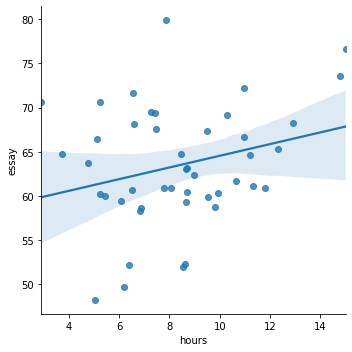

In [5]:
_ = sns.lmplot(data=essay, x='hours', y='essay')
plt.show()

In [6]:
st.shapiro(essay['hours'])

(0.981028139591217, 0.6615097522735596)

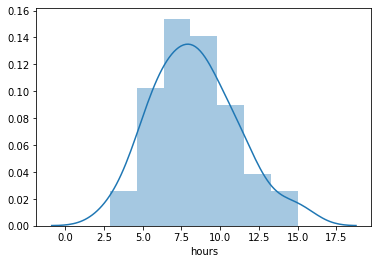

In [7]:
_ = sns.distplot(essay['hours'])

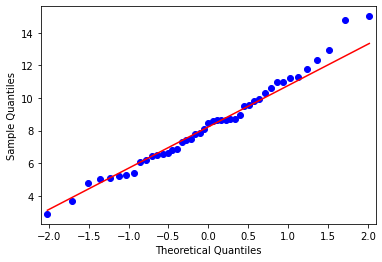

In [8]:
_ = sm.qqplot(essay['hours'],line='q')

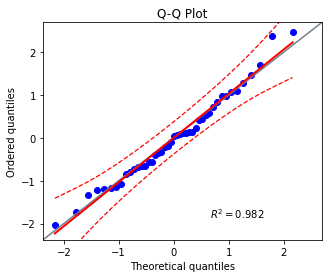

In [10]:
#using pingouin
import pingouin as pg
_= pg.qqplot(essay['hours'])

In [12]:
r, p = st.pearsonr(essay['hours'], essay['essay'])
(r,p)

(0.2666837455272351, 0.07658508264530009)

In [13]:
# from above cell , for one tailed 
p_onetailed = p/2
p_onetailed

0.038292541322650045

#### Hence ,significant


In [14]:
essay['grade'].unique()

array(['Upper Second Class', 'First Class', 'Third Class',
       'Lower Second Class'], dtype=object)

In [16]:
grade_num={'First Class':1, 'Upper Second Class':2, 'Lower Second Class':3, 'Third Class':4}
essay['grade_num'] = essay['grade'].map(grade_num)
essay.head()

,essay,hours,grade,grade_num
0,61.675497,10.630337,Upper Second Class,2
1,69.545006,7.285226,First Class,1
2,48.229304,5.052048,Third Class,4
3,70.678652,2.886614,First Class,1
4,59.899623,9.545012,Lower Second Class,3


In [17]:
# now using grade 
st.spearmanr(essay['hours'], essay['grade_num'])

SpearmanrResult(correlation=-0.1930781010030226, pvalue=0.20381518662944526)

In [18]:
st.kendalltau(essay['hours'], essay['grade_num'])

KendalltauResult(correlation=-0.15755663209256654, pvalue=0.17836122458507397)

### In both cases the correlation is non-significant. There was no significant relationship between degree grade classification for an essay and the time spent doing it, ρ = –.19, ns, and τ = –.16, ns. Note that the direction of the relationship has reversed. This has happened because the essay marks were recoded as 1 (first), 2 (upper second), 3 (lower second), and 4 (third), so high grades were represented by low numbers!This illustrates one of the benefits of not taking continuous data (like percentages) and transforming them into categorical data: when you do, you lose information and often statistical power!